In [ ]:
first_name= "Pouria"
last_name= "Dadkhah"
student_number= "401201381"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

In [4]:
# Set device (GPU if available, else CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Task 1

Part a) Prepare model and train it.

we used resnet model in this question

In [5]:
# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset with specific classes (airplane and automobile)
class_names = ['airplane', 'automobile']
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices for the specified classes
class_indices = [i for i in range(len(train_dataset)) if train_dataset.classes[train_dataset.targets[i]] in class_names]

# Create a subset of the original dataset with the specified classes
train_dataset = torch.utils.data.Subset(train_dataset, class_indices)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)


100%|██████████| 170498071/170498071 [00:03<00:00, 43871959.02it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
# Select a pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Modify fully connected layer for binary classification
model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 2)  # Two output classes: airplane and automobile
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


In [7]:
# Initialize weights related to the fully connected layer
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

In [8]:
model.fc.apply(weights_init)

# Move the model to the specified device
model = model.to(device)

# Define cross-entropy loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [9]:
# Training the model
num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 1/10, Loss: 0.0831, Accuracy: 0.9664


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 2/10, Loss: 0.0510, Accuracy: 0.9816


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 3/10, Loss: 0.0453, Accuracy: 0.9825


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 4/10, Loss: 0.0406, Accuracy: 0.9860


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 5/10, Loss: 0.0329, Accuracy: 0.9875


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 6/10, Loss: 0.0306, Accuracy: 0.9880


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 7/10, Loss: 0.0322, Accuracy: 0.9875


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 8/10, Loss: 0.0300, Accuracy: 0.9893


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 9/10, Loss: 0.0242, Accuracy: 0.9901


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch 10/10, Loss: 0.0184, Accuracy: 0.9926


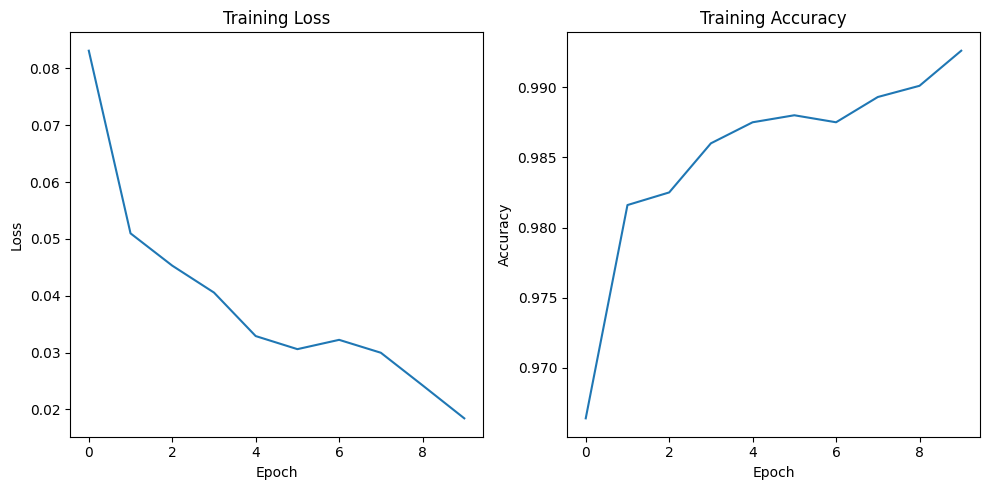

In [10]:
# Plotting the accuracy and loss graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

part b) Test The Model:

In [10]:
# Load CIFAR-10 test dataset with specific classes (airplane and automobile)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataset = torch.utils.data.Subset(test_dataset, [i for i in range(len(test_dataset)) if test_dataset.classes[test_dataset.targets[i]] in class_names])

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Evaluation mode
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Test Accuracy: 0.9805


In [ ]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'basic_model.pth')
torch.save(model, path)

In [9]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'basic_model.pth')
model = torch.load(path)

# Part 2

In [11]:

import torch
from torch.utils.data import Dataset, DataLoader
import random

class TripletDataset(Dataset):
    def __init__(self, base_dataset):
        self.base_dataset = base_dataset
        self.labels = [label for _, label in base_dataset]  # Extract labels from the base dataset
        self.num_classes = len(set(self.labels))

        self.classes_indices = [[] for _ in range(self.num_classes)]
        for index, label in enumerate(self.labels):
            self.classes_indices[label].append(index)

    def __getitem__(self, index):
        anchor_index = index
        anchor_class = self.labels[anchor_index]

        positive_index = random.choice(list(set(self.classes_indices[anchor_class]) - {anchor_index}))

        negative_class = random.choice(list(range(0, anchor_class)) + list(range(anchor_class + 1, self.num_classes)))
        negative_index = random.choice(self.classes_indices[negative_class])

        anchor_image, _ = self.base_dataset[anchor_index]
        positive_image, _ = self.base_dataset[positive_index]
        negative_image, _ = self.base_dataset[negative_index]

        return anchor_image, positive_image, negative_image

    def __len__(self):
        return len(self.labels)

# Usage:
triplet_dataset = TripletDataset(train_dataset)
triplet_loader = DataLoader(triplet_dataset, batch_size=32, shuffle=True, num_workers=4)

# import torch
# from torch.utils.data import Dataset, DataLoader
# import random

# class TripletDataset(Dataset):
#     def __init__(self, base_dataset, class_names):
#         self.base_dataset = base_dataset
#         self.labels = [label for _, label in base_dataset]  # Extract labels from the base dataset

#         # Filter indices for the specified classes
#         self.class_indices = [i for i in range(len(self.labels)) if class_names[self.labels[i]] in class_names]

#     def __getitem__(self, index):
#         anchor_index = index
#         anchor_class = self.labels[anchor_index]

#         positive_index = random.choice(self.class_indices)
#         negative_class = random.choice(list(set(self.class_indices) - {anchor_index}))
#         negative_index = random.choice(self.class_indices)

#         anchor_image, _ = self.base_dataset[anchor_index]
#         positive_image, _ = self.base_dataset[positive_index]
#         negative_image, _ = self.base_dataset[negative_index]

#         return anchor_image, positive_image, negative_image

#     def __len__(self):
#         return len(self.labels)

# # Usage:
# triplet_dataset = TripletDataset(train_dataset, class_names)
# triplet_loader = DataLoader(triplet_dataset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1/10, Loss: 0.2502
Epoch 2/10, Loss: 0.1251
Epoch 3/10, Loss: 0.0832
Epoch 4/10, Loss: 0.0626
Epoch 5/10, Loss: 0.0478
Epoch 6/10, Loss: 0.0395
Epoch 7/10, Loss: 0.0446
Epoch 8/10, Loss: 0.0362
Epoch 9/10, Loss: 0.0228
Epoch 10/10, Loss: 0.0280


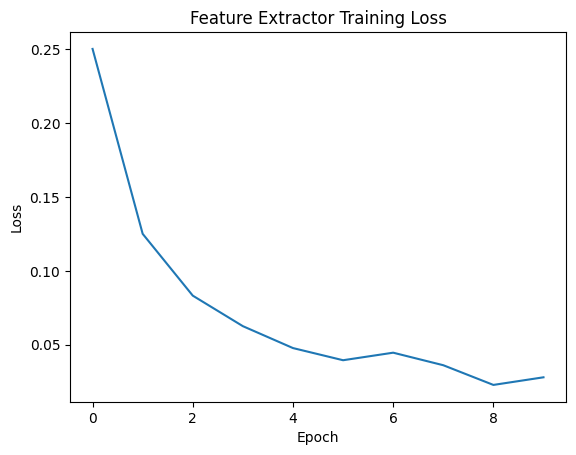

In [12]:
# Assuming you already have the ResNet50 model without the fully connected layer
model_feature_extractor = models.resnet50(pretrained=True)
model_feature_extractor = nn.Sequential(*list(model_feature_extractor.children())[:-1])  # Remove the last fully connected layer
model_feature_extractor = model_feature_extractor.to(device)

# Triplet loss criterion
triplet_criterion = nn.TripletMarginLoss(margin=1.0)

# Adam optimizer for feature extractor
optimizer_feature_extractor = optim.Adam(model_feature_extractor.parameters(), lr=0.001)

# Training loop for feature extractor with triplet loss
num_epochs_feature_extractor = 10
losses_feature_extractor = []

for epoch in range(num_epochs_feature_extractor):
    running_loss = 0.0

    for anchor, positive, negative in triplet_loader:
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

        optimizer_feature_extractor.zero_grad()

        # Forward pass
        features_anchor = model_feature_extractor(anchor)
        features_positive = model_feature_extractor(positive)
        features_negative = model_feature_extractor(negative)

        # # Set requires_grad to True
        # features_anchor.requires_grad_()
        # features_positive.requires_grad_()
        # features_negative.requires_grad_()

        # Triplet loss
        loss = triplet_criterion(features_anchor, features_positive, features_negative)
        loss.backward()
        optimizer_feature_extractor.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(triplet_loader)
    losses_feature_extractor.append(epoch_loss)

    print(f'Epoch {epoch+1}/{num_epochs_feature_extractor}, Loss: {epoch_loss:.4f}')

# Plotting the loss graph
plt.plot(losses_feature_extractor)
plt.title('Feature Extractor Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [13]:
import os

local_path = '.'
path = os.path.join(local_path, 'best_triple_loss.pth')
torch.save(model_feature_extractor, path)

In [ ]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'best_triple_loss.pth')
model_feature_extractor = torch.load(path)

In [23]:
# Create a new model with the trained feature extractor and a new fully connected layer
model_classifier = nn.Sequential(
    model_feature_extractor,
    nn.Flatten(),
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 2)  # Two output classes: airplane and automobile
)

model_classifier = model_classifier.to(device)

# Freeze the weights of the feature extractor
for param in model_classifier[0].parameters():
    param.requires_grad = False

# Cross-entropy loss criterion
ce_criterion = nn.CrossEntropyLoss()

# Adam optimizer for the classifier
optimizer_classifier = optim.Adam(model_classifier.parameters(), lr=0.001)

# Training loop for the fully connected layer with cross-entropy loss
num_epochs_classifier = 10
losses_classifier = []
accuracies = []

for epoch in range(num_epochs_classifier):
    running_loss = 0.0

    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_classifier.zero_grad()

        # Forward pass
        outputs = model_classifier(inputs)

        # Cross-entropy loss
        loss = ce_criterion(outputs, labels)
        loss.backward()
        optimizer_classifier.step()

        running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    losses_classifier.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs_classifier}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


Epoch 1/10, Loss: 0.1158, Accuracy: 0.8750
Epoch 2/10, Loss: 0.1060, Accuracy: 1.0000
Epoch 3/10, Loss: 0.1015, Accuracy: 0.8750
Epoch 4/10, Loss: 0.1034, Accuracy: 0.9375
Epoch 5/10, Loss: 0.1004, Accuracy: 1.0000
Epoch 6/10, Loss: 0.1033, Accuracy: 1.0000
Epoch 7/10, Loss: 0.1006, Accuracy: 1.0000
Epoch 8/10, Loss: 0.1007, Accuracy: 0.8750
Epoch 9/10, Loss: 0.1031, Accuracy: 1.0000
Epoch 10/10, Loss: 0.0991, Accuracy: 1.0000


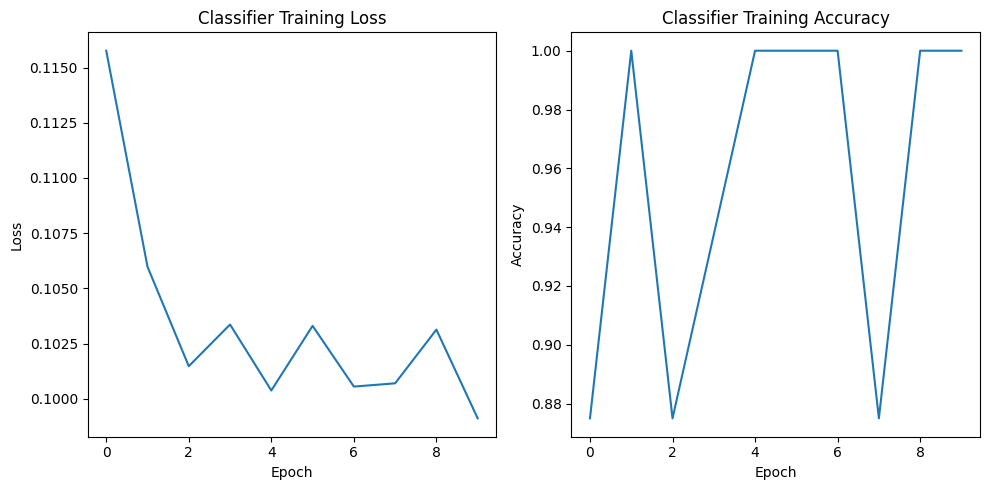

In [24]:
# Plotting the accuracy and loss graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_classifier)
plt.title('Classifier Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Classifier Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [25]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'best_ce_loss.pth')
torch.save(model_classifier, path)

In [ ]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'best_ce_loss.pth')
model_classifier = torch.load(path)

In [18]:
# Calculating Final Accuracy on Test Dataset
# Load CIFAR-10 test dataset with specific classes (airplane and automobile)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataset = torch.utils.data.Subset(test_dataset, [i for i in range(len(test_dataset)) if test_dataset.classes[test_dataset.targets[i]] in class_names])

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Evaluation mode for the classifier
model_classifier.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model_classifier(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Final Test Accuracy: {accuracy:.4f}')

Files already downloaded and verified
Final Test Accuracy: 0.9840


# Part 3

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.1493, Accuracy: 0.9032
Epoch 2/10, Loss: 0.8536, Accuracy: 0.9111
Epoch 3/10, Loss: 0.5580, Accuracy: 0.9192
Epoch 4/10, Loss: 0.4958, Accuracy: 0.9225
Epoch 5/10, Loss: 0.4310, Accuracy: 0.9383
Epoch 6/10, Loss: 0.3191, Accuracy: 0.9362
Epoch 7/10, Loss: 0.3414, Accuracy: 0.9383
Epoch 8/10, Loss: 0.2536, Accuracy: 0.9508
Epoch 9/10, Loss: 0.2294, Accuracy: 0.9533
Epoch 10/10, Loss: 0.1975, Accuracy: 0.9626


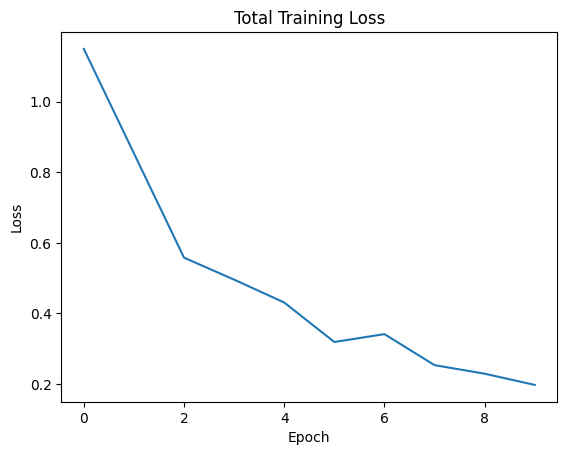

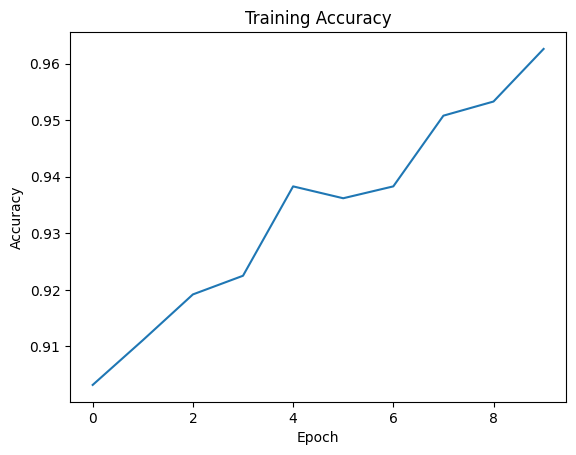

Final Test Accuracy: 0.9550


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import random

# Assuming you have the TripletDataset class defined as you provided

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset with specific classes (airplane and automobile)
class_names = ['airplane', 'automobile']
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataset = torch.utils.data.Subset(train_dataset, [i for i in range(len(train_dataset)) if train_dataset.classes[train_dataset.targets[i]] in class_names])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Load CIFAR-10 test dataset with specific classes (airplane and automobile)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataset = torch.utils.data.Subset(test_dataset, [i for i in range(len(test_dataset)) if test_dataset.classes[test_dataset.targets[i]] in class_names])

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Create the TripletDataset and DataLoader
triplet_dataset = TripletDataset(train_dataset)
triplet_loader = DataLoader(triplet_dataset, batch_size=32, shuffle=True, num_workers=4)

# Assuming you already have the ResNet50 model without the fully connected layer
model_feature_extractor = models.resnet50(pretrained=True)
model_feature_extractor = nn.Sequential(*list(model_feature_extractor.children())[:-1])  # Remove the last fully connected layer
model_feature_extractor = model_feature_extractor.to(device)

# Classifier model
model_classifier = nn.Sequential(
    model_feature_extractor,
    nn.Flatten(),
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 2)  # Two output classes: airplane and automobile
)

model_classifier = model_classifier.to(device)

# Combined loss criterion
triplet_criterion = nn.TripletMarginLoss(margin=1.0)
ce_criterion = nn.CrossEntropyLoss()

# Adam optimizer for the entire model
optimizer = optim.Adam(model_classifier.parameters(), lr=0.001)

# Training loop for the whole model with combined loss
num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model_classifier(inputs)

        # Split the outputs for triplet and cross-entropy loss
        features = model_feature_extractor(inputs)
        outputs_ce = outputs

        # Calculate triplet loss
        anchor, positive, negative = triplet_loader.dataset[0]
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)
        features_anchor = model_feature_extractor(anchor.unsqueeze(0))
        features_positive = model_feature_extractor(positive.unsqueeze(0))
        features_negative = model_feature_extractor(negative.unsqueeze(0))
        loss_triplet = triplet_criterion(features_anchor, features_positive, features_negative)

        # Calculate cross-entropy loss
        loss_ce = ce_criterion(outputs_ce, labels)

        # Combined loss
        loss_total = loss_triplet + loss_ce

        # Backward pass
        loss_total.backward()
        optimizer.step()

        running_loss += loss_total.item()

        # Accuracy
        _, predicted = torch.max(outputs_ce.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    epoch_accuracy = correct / total
    accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting the loss graph
plt.plot(losses)
plt.title('Total Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plotting the accuracy graph
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Calculating Final Accuracy on Test Dataset

model_classifier.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model_classifier(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Final Test Accuracy: {accuracy:.4f}')


In [22]:
import os

local_path = '/content/drive/MyDrive/Deep Learning/DL_HW3'
path = os.path.join(local_path, 'best_combined_loss.pth')
torch.save(model_classifier, path)